### Example with jupyter/pandas

<pre>
on the server side, create OneDB demo database stores_demo
% dbaccessdemo7 -log

on the client machine, open a terminal windows, type command:
pip3 install numpy
pip3 install pandas
pip3 install jupyter

% jupyter notebook
</pre>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import IfxPy
import IfxPyDbi as dbapi2

In [4]:
constr = "SERVER=lx2;database=stores_demo;HOST=localhost;SERVICE=6001;UID=informix;PWD=xxxxxxxx"
conn = dbapi2.connect(constr, "", "")
cur = conn.cursor()

In [5]:
# query customer table
s = "SELECT * from customer"
cur.execute(s)
t = cur.fetchall()
columns = ['customer_num','fname','lname','company','address1','address2','city','state','zipcode','phone']
df = pd.DataFrame(data=t, columns=columns)

In [7]:
df

,customer_num,fname,lname,company,address1,address2,city,state,zipcode,phone
0,101,Ludwig,Pauli,All Sports Supplies,213 Erstwild Court,None,Sunnyvale,CA,94086,408-789-8075
1,102,Carole,Sadler,Sports Spot,785 Geary St,None,San Francisco,CA,94117,415-822-1289
2,103,Philip,Currie,Phil's Sports,654 Poplar,P. O. Box 3498,Palo Alto,CA,94303,415-328-4543
3,104,Anthony,Higgins,Play Ball!,East Shopping Cntr.,422 Bay Road,Redwood City,CA,94026,415-368-1100
4,105,Raymond,Vector,Los Altos Sports,1899 La Loma Drive,None,Los Altos,CA,94022,415-776-3249
5,106,George,Watson,Watson & Son,1143 Carver Place,None,Mountain View,CA,94063,415-389-8789
6,107,Charles,Ream,Athletic Supplies,41 Jordan Avenue,None,Palo Alto,CA,94304,415-356-9876
7,108,Donald,Quinn,Quinn's Sports,587 Alvarado,None,Redwood City,CA,94063,415-544-8729
8,109,Jane,Miller,Sport Stuff,Mayfair Mart,7345 Ross Blvd.,Sunnyvale,CA,94086,408-723-8789
9,110,Roy,Jaeger,AA Athletics,520 Topaz Way,None,Redwood City,CA,94062,415-743-3611


In [8]:
s = """
select o.order_num, sum (i.total_price)::int price
        from orders o, items i
        where o.order_date > '01/01/1989'
                and o.customer_num > 110
                and o.order_num = i.order_num
        group by 1 order by 1
"""
cur.execute(s)
t = cur.fetchall()
columns = ['order_num','price']
df = pd.DataFrame(data=t, columns=columns)

In [9]:
df

,order_num,price
0,1005,562
1,1006,448
2,1007,1696
3,1009,450
4,1010,84
5,1012,1040
6,1016,654
7,1017,584
8,1018,1131
9,1019,1499


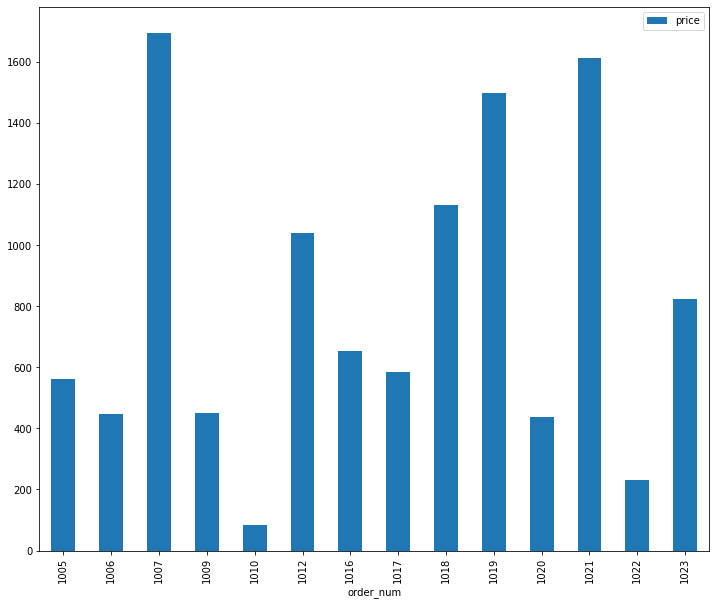

In [10]:
# plot column values as bar
df.plot(kind='bar', x='order_num', y='price', figsize=(12,10))

In [11]:
s = """
--
-- Extract values from a specific TimeSeries aggregated by day
-- Return the result in SQL standard format
--
SELECT tstamp::DATETIME YEAR TO DAY, value::int
FROM TABLE ((
        SELECT TSSetToList(AggregateBy('SUM($value)', 'cal1day', raw_reads,
                        0, '2010-11-10 00:00'::datetime year to minute,
                        '2010-12-10 23:45'::datetime year to minute)
                        )::list(meter_data not null)
        FROM ts_data
        WHERE loc_esi_id = '4727354321355594'
));
"""
cur.execute(s)
t = cur.fetchall()
columns = ['date','value']
df = pd.DataFrame(data=t, columns=columns)

In [12]:
df

,date,value
0,2010-11-10,44
1,2010-11-11,13
2,2010-11-12,81
3,2010-11-13,41
4,2010-11-14,6
5,2010-11-15,34
6,2010-11-16,246
7,2010-11-17,22
8,2010-11-18,1
9,2010-11-19,9


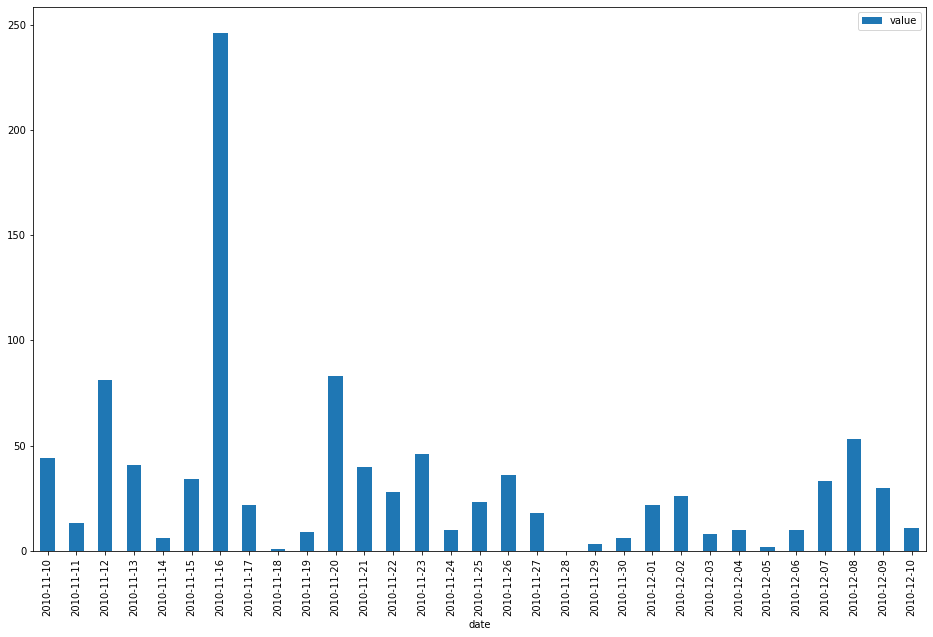

In [13]:
# plot column values as bar
df.plot(kind='bar', x='date', y='value', figsize=(16,10))

In [14]:
cur.close()
conn.close()

True